In [1]:
## The Loan Prediction Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

train = pd.read_csv("/home/aakash/datasets/trainloan.csv")
test = pd.read_csv("/home/aakash/datasets/loanpred.csv")

In [2]:
print(train.shape)
print(train.columns)
train.head()

(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(test.shape)
test.head() ## Seems like Loan_status is our target variable.

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
## Lets combine the train and test sets
data = pd.concat([train, test])

print(data.shape)
print(data.describe()) ## Describe() only for numerical variables
data.tail()

(981, 13)
       ApplicantIncome  CoapplicantIncome  Credit_History  LoanAmount  \
count       981.000000         981.000000      902.000000  954.000000   
mean       5179.795107        1601.916330        0.835920  142.511530   
std        5695.104533        2718.772806        0.370553   77.421743   
min           0.000000           0.000000        0.000000    9.000000   
25%        2875.000000           0.000000        1.000000  100.000000   
50%        3800.000000        1110.000000        1.000000  126.000000   
75%        5516.000000        2365.000000        1.000000  162.000000   
max       81000.000000       41667.000000        1.000000  700.000000   

       Loan_Amount_Term  
count        961.000000  
mean         342.201873  
std           65.100602  
min            6.000000  
25%          360.000000  
50%          360.000000  
75%          360.000000  
max          480.000000  


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
362,4009,1777.0,1.0,3+,Not Graduate,Male,113.0,360.0,LP002971,NaN,Yes,Urban,Yes
363,4158,709.0,1.0,0,Graduate,Male,115.0,360.0,LP002975,NaN,Yes,Urban,No
364,3250,1993.0,NaN,0,Graduate,Male,126.0,360.0,LP002980,NaN,No,Semiurban,No
365,5000,2393.0,1.0,0,Graduate,Male,158.0,360.0,LP002986,NaN,Yes,Rural,No
366,9200,0.0,1.0,0,Graduate,Male,98.0,180.0,LP002989,NaN,No,Rural,Yes


In [5]:
## Missing Value Imputation
print(train.isnull().sum());
print(test.isnull().sum()) ## Ok so for Gender, Married, Dependents, Self_employed like variables its better if 
# we replace these with the mode value.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [6]:
## Clearly it makes more sensecat.code of Credit History as a categorical variable
data['Credit_History'].astype('category')

## Categorical variables
cat_col = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
cat_col.remove('Loan_ID') ## removing the Id columns
cat_col.remove('Loan_Status')

for cat in cat_col:
    print("\n\n Freq. of category %s"%cat)
    print(data[cat].value_counts())



 Freq. of category Dependents
0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64


 Freq. of category Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64


 Freq. of category Gender
Male      775
Female    182
Name: Gender, dtype: int64


 Freq. of category Married
Yes    631
No     347
Name: Married, dtype: int64


 Freq. of category Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64


 Freq. of category Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64


In [7]:
## Doing the missing value imputation for categorical data using mode values
for cat in cat_col:
    data[cat].fillna(pd.get_dummies(data[cat]).sum().sort_values(ascending = False).index[0] , inplace = True)
    
## for Continuous variables using mean values
data.LoanAmount.fillna(data.LoanAmount.mean(), inplace = True)
data.Credit_History.fillna(data.Credit_History.mean(), inplace = True)
data.Loan_Amount_Term.fillna(360, inplace = True)

In [8]:
## One Hot Encoding - Dummy Variables because it is necessary for ml model
data = pd.get_dummies(data, columns = ['Dependents', 'Education', 'Gender', 'Married', 
                                       'Property_Area', 'Self_Employed', 'Loan_Status'])
dataneu = data.drop(['Loan_ID', 'Loan_Status_N'], axis = 1)
dataneu.head()
## Now we are ready to build our ml model.

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,Loan_Status_Y
0,5849,0.0,1.0,142.51153,360.0,1,0,0,0,1,...,0,1,1,0,0,0,1,1,0,1
1,4583,1508.0,1.0,128.00000,360.0,0,1,0,0,1,...,0,1,0,1,1,0,0,1,0,0
2,3000,0.0,1.0,66.00000,360.0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,1
3,2583,2358.0,1.0,120.00000,360.0,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,1
4,6000,0.0,1.0,141.00000,360.0,1,0,0,0,1,...,0,1,1,0,0,0,1,1,0,1


In [9]:
## Now lets separate the dataneu back to train and test.
trainnu = dataneu.iloc[0:614 , :]
testnu = dataneu.iloc[614: , :]
## Now we have our modified test and train data. 

In [10]:
## Only dealing with the train data now
trainnu_y = trainnu['Loan_Status_Y']
trainnu_x = trainnu.drop('Loan_Status_Y' , axis = 1)

## Doing Some cross validations now so we will split this trainnu_x and trainnu_y also.
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(trainnu_x, trainnu_y, test_size = 0.10, random_state = 44)

In [11]:
## MODELLING STAGE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
models = []

models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("LR", LogisticRegression()))
models.append(("Dtree", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))
models.append(("GBM", GradientBoostingClassifier()))

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
# Now we will use holdout method to find the best model.
## HOLD OUT CROSS VALIDATION
names = []
score = []

for name, model in models:
    mod = model.fit(x_train, y_train)
    score.append(accuracy_score(y_val, mod.predict(x_val)))
    names.append(name)
    
print(pd.DataFrame({"Names" : names, "Scores" : score}))    
## Voila!! Man!! we are obtaining 82.79% accuracy using Logistic Regression model.
## Till now we have not disturbed our test set.

   Names    Scores
0    KNN  0.677419
1    SVM  0.741935
2     LR  0.854839
3  Dtree  0.709677
4     NB  0.822581
5     RF  0.709677
6    GBM  0.806452


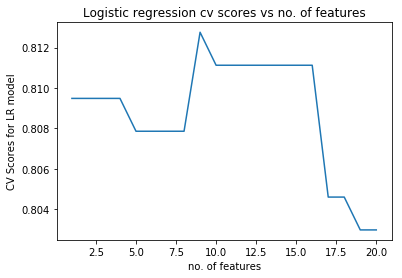

[False False  True False False False  True False False False  True False
  True  True False  True False  True  True  True]


In [14]:
## FEATURE SELECTION(******)
## feature eng. using recursive feature elimination
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfe = RFECV(LogisticRegression(), step = 1, cv = StratifiedKFold() , scoring = 'accuracy')
rfe.fit(trainnu_x, trainnu_y)

plt.figure()
plt.title("Logistic regression cv scores vs no. of features")
plt.xlabel('no. of features')
plt.ylabel("CV Scores for LR model")
plt.plot(range(1, len(rfe.grid_scores_)+1), rfe.grid_scores_)
plt.show()

## so number of features should be 10, thats where we get max. accuracy. 
print(rfe.support_) # for finding those 10 features

In [15]:
x_new = trainnu[['Credit_History', 'Dependents_1', 'Education_Not Graduate', 
                'Gender_Male', 'Married_No', 'Property_Area_Rural', 'Property_Area_Urban',
                'Self_Employed_No', 'Self_Employed_Yes']]

x_train, x_val, y_train, y_val = train_test_split(x_new, trainnu_y, test_size = 0.10, random_state = 44)

In [16]:
testnu_x = testnu.drop('Loan_Status_Y' , axis = 1)
testt_x = testnu[['Credit_History', 'Dependents_1', 'Education_Not Graduate', 
                'Gender_Male', 'Married_No', 'Property_Area_Rural', 'Property_Area_Urban',
                'Self_Employed_No', 'Self_Employed_Yes']]

## LOGISTIC REGRESSION MODEL
logit = LogisticRegression()
logit.fit(x_train, y_train)
pred = logit.predict(testt_x)

logit_test_y = ["Y" if i == 1 else "N" for i in pred]
pd.DataFrame({'Loan_ID':test.Loan_ID, 'Loan_Status': logit_test_y}).to_csv('LR_loanpred2.csv', index=False)

In [17]:
## MODEL PARAMETER TUNING(****)
# Instead of having to manually search for optimum parameters, 
# we can easily perform an exhaustive search using the GridSearchCV, 
# which does an “exhaustive search over specified parameter values for an estimator”.
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import GridSearchCV
cval = list(np.arange(1,10))

param_grid = [
    {"C":cval, "penalty": ['l1'], "solver": ['liblinear'], "multi_class" : ['ovr']},
    {"C":cval, "penalty": ['l2'], "solver": ['liblinear', 'newton-cg', 'lbfgs'], "multi_class" : ['ovr']}
]

grid = GridSearchCV(LogisticRegression(), param_grid, cv = StratifiedKFold(), scoring = 'accuracy')
grid.fit(trainnu_x, trainnu_y)
print(grid.best_params_)
print(grid.best_estimator_)

/home/aakash/miniconda3/envs/datapysci/lib/python3.6/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/aakash/miniconda3/envs/datapysci/lib/python3.6/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/aakash/miniconda3/envs/datapysci/lib/python3.6/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/aakash/miniconda3/envs/datapysci/lib/python3.6/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/aakash/miniconda3/envs/datapysci/lib/python3.6/site-pa

{'C': 2, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [18]:
logit2 = LogisticRegression(C = 2, multi_class='ovr', penalty = 'l1', solver = 'liblinear')
logit2.fit(x_train, y_train)
pred2 = logit2.predict(testt_x)

logit_test_y2 = ["Y" if i == 1 else "N" for i in pred2]
pd.DataFrame({'Loan_ID':test.Loan_ID, 'Loan_Status': logit_test_y2}).to_csv('LR_loanpred3.csv', index=False)